In [1]:
%reset
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from functions import loader, splt, fitter, stats, grouper
import matplotlib.pyplot as plt

savedir = "F01/"

In [3]:
all_data = loader.load_data()
data = loader.remove_duplicates( all_data,
    lambda d: ( d['dep_polymers'], d['side'], d['defects_frac'], d['gamma'] ),
    lambda d: d['runned_replicas']
)
len( data )

132

In [4]:
for d in data:
    x, y = fitter.rebin_n( d['h_x'], d['h'], 50 )
    d['fits'] = fitter.fits( x, y, d, threshold=0.5, plot=False )
    d['np_std'] = np.std( d['chunks'], ddof=1 ) / d['side'] / d['side']

c:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


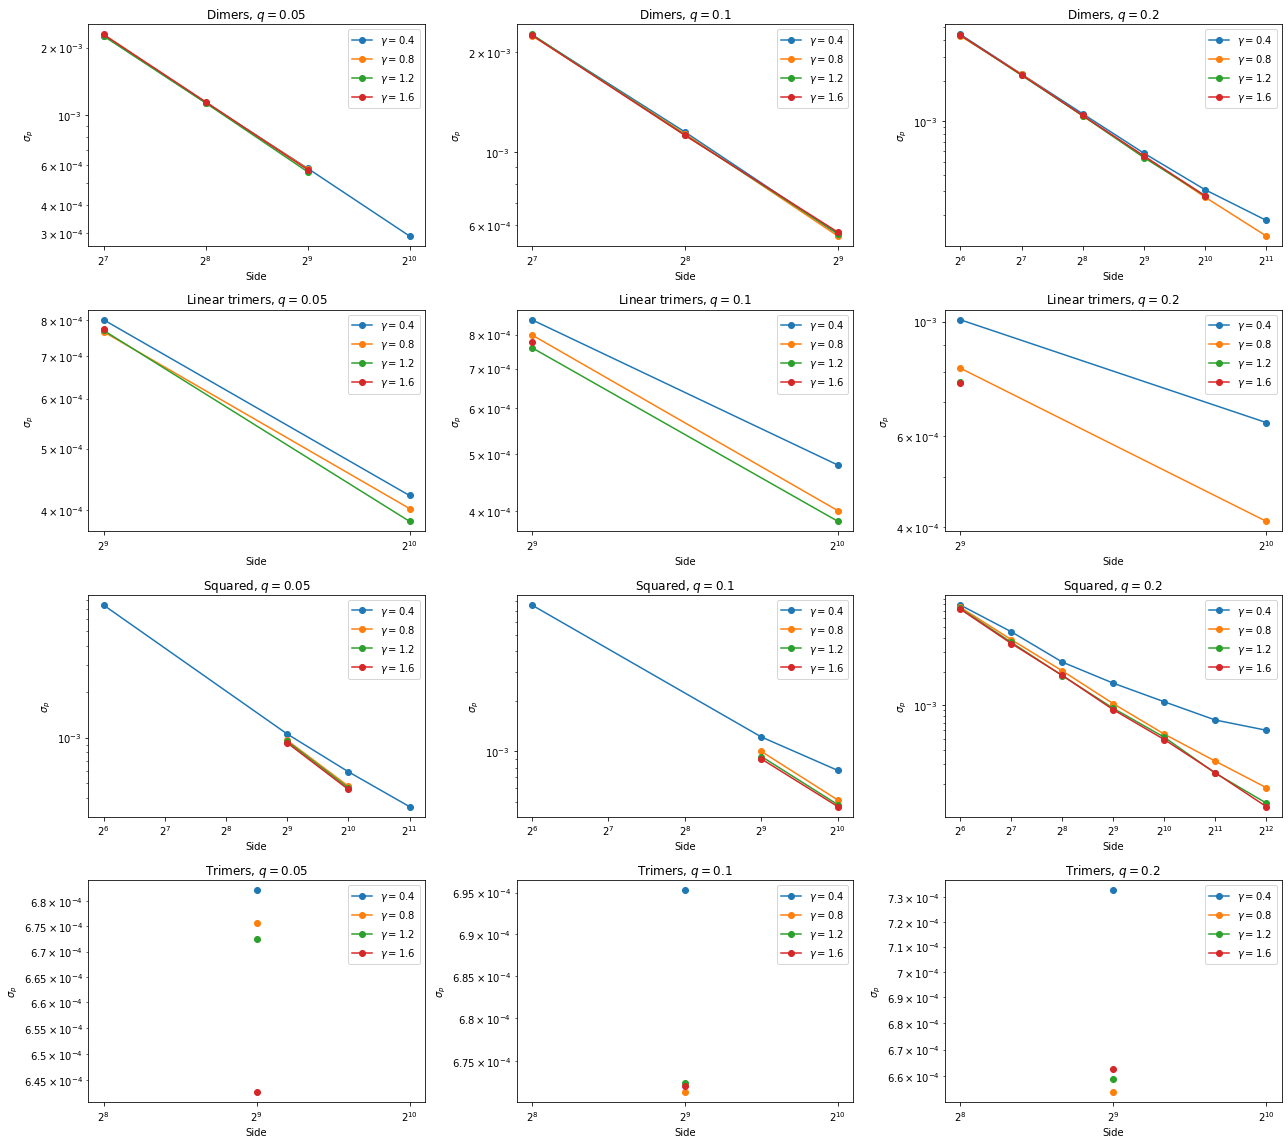

In [5]:
filtered_data = data[ np.vectorize( lambda d: ( d['gamma'] in [0.4, 0.8, 1.2, 1.6] ) and ( d['defects_frac'] in [0.05, 0.1, 0.2] ) )(data) ]

splt.iterate(
    len( filtered_data ),
    lambda d: filtered_data[d]['dep_polymers'],
    lambda d: filtered_data[d]['defects_frac'],
    lambda d: filtered_data[d]['gamma'],
    lambda d: filtered_data[d]['side'],
    lambda d: [
        filtered_data[d]['fits']['Gauss']['pars'][2]
    ],
    lambda r, c, l: [
        { 'label': fr"$\gamma = {l:.1f}$", 'ls': '-', 'marker': 'o' }
    ],
    lambda r, c: (
        plt.title( fr"{r}, $q = {c}$" ),
        plt.xscale( 'log', basex = 2 ),
        plt.yscale( 'log', basey = 10 ),
        plt.xlabel( "Side" ),
        plt.ylabel( fr"$\sigma_p$" ),
    )
)

plt.tight_layout()
plt.savefig( savedir + '/sigma_size.pdf' )

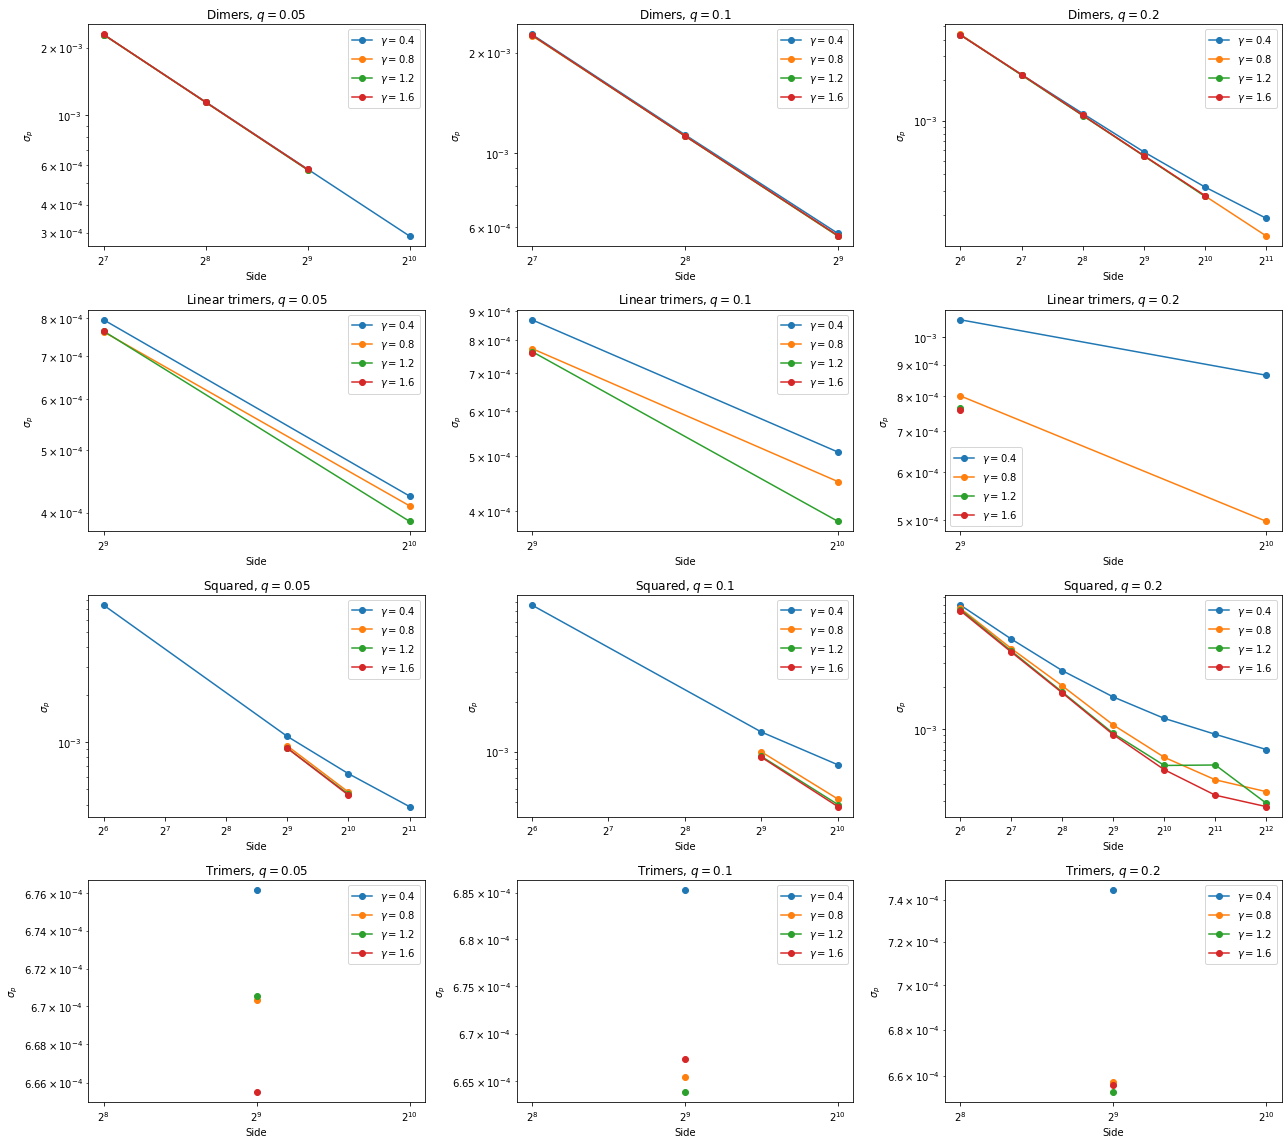

In [6]:
filtered_data = data[ np.vectorize( lambda d: ( d['gamma'] in [0.4, 0.8, 1.2, 1.6] ) and ( d['defects_frac'] in [0.05, 0.1, 0.2] ) )(data) ]

splt.iterate(
    len( filtered_data ),
    lambda d: filtered_data[d]['dep_polymers'],
    lambda d: filtered_data[d]['defects_frac'],
    lambda d: filtered_data[d]['gamma'],
    lambda d: filtered_data[d]['side'],
    lambda d: [
        filtered_data[d]['np_std']
    ],
    lambda r, c, l: [
        { 'label': fr"$\gamma = {l:.1f}$", 'ls': '-', 'marker': 'o' }
    ],
    lambda r, c: (
        plt.title( fr"{r}, $q = {c}$" ),
        plt.xscale( 'log', basex = 2 ),
        plt.yscale( 'log', basey = 10 ),
        plt.xlabel( "Side" ),
        plt.ylabel( fr"$\sigma_p$" ),
    )
)

plt.tight_layout()
plt.savefig( savedir + '/sigma_size_np.pdf' )